# 1.Scikit learn comes with pre-loaded dataset, load the digits dataset from that collection and write a helper function to plot the image using matplotlib.[Hint:Explore datasets module from scikit learn]

(1797, 64)


<Figure size 432x288 with 0 Axes>

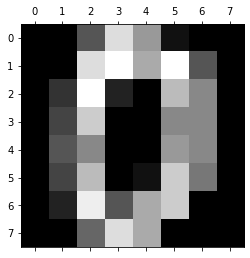

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

# Make a train -test split with 20% of the data set aside for testing. Fit a logistic regression model and observe the accuracy

In [6]:
X = digits.data
y = digits.target

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.2)

In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [12]:
model.fit(X_train,y_train)

/home/tushar/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
y_pred=model.predict(X_test)

In [15]:
#Accuracy Score
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.9583333333333334

## Using scikit learn perform a PCA transformation such that the transformed dataset can explain 95% of the variance in the original dataset. Find out the number of components in the projected subspace

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=64, svd_solver='full')
pca.fit(X)
PCA(n_components=2, svd_solver='full')
print(pca.singular_values_>9.5)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False False False False False False
 False False False False]


# Transform the dataset and fit a logistic regression and observe the accuracy. Compare it with the previous model andcomment on the accuracy.

In [28]:
X = digits.data[:,0:54]
y = digits.target

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.2)

In [31]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()

In [32]:
model.fit(X_train,y_train)

/home/tushar/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
y_pred=model.predict(X_test)

In [34]:
#Accuracy Score
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.9666666666666667

In [35]:
#Accuracy is now higher

# Compute the confusion matrix and count the number of instances that has gone wrong. For each of the wrong sample,plot the digit along with predicted and original label

In [38]:
from sklearn.metrics import confusion_matrix
arr=confusion_matrix(y_test, y_pred)
arr

array([[40,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 32,  0,  1,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 33,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 32,  0,  0,  1,  2],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 28,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 40,  1],
       [ 0,  0,  0,  2,  0,  1,  0,  0,  0, 35]])

In [41]:
count=0
liw=[]
lir=[]
for i in range(10):
    for j in range(10):
        if(i!=j and arr[i][j]!=0):
            count=count+arr[i][j]
            liw.append(j)
            lir.append(i)

In [42]:
count

12

In [43]:
liw

[3, 5, 8, 9, 8, 9, 1, 9, 3, 5]

In [44]:
lir

[1, 3, 3, 3, 5, 5, 8, 8, 9, 9]

In [45]:
import matplotlib.pyplot as plt


Text(0, 0.5, 'orignal')

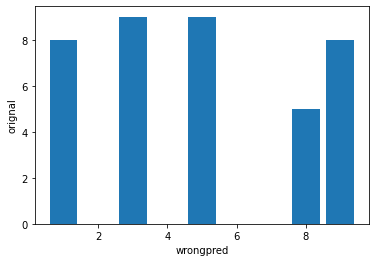

In [50]:
plt.bar(liw,lir)
plt.xlabel('wrongpred')
plt.ylabel('orignal')